In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import imp
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import elephant
import pickle as pkl
from brian2 import ms, second
import pdb
import sys
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [4]:
from triple_brian2 import branched_triple, branched_spike_triple

In [4]:
stim_times, spk_prev_i, spk_prev_t, spk_mon2_i, spk_mon2_t = branched_triple(
    runtime=100*second, progress_bar=tqdm)

HBox(children=(IntProgress(value=0, max=1000000), HTML(value='')))

In [6]:
d = np.load('longrun_triple_branched.npz', allow_pickle=True)['data'][()]

In [7]:
stim_times, spk_prev_i, spk_prev_t, spk_mon2_i, spk_mon2_t = map(
    d.get, ['stim_times', 'spk_prev_i', 'spk_prev_t', 'spk_mon2_i', 'spk_mon2_t'])

In [8]:
spk_prev_i = np.array(spk_prev_i)
spk_prev_t = np.array(spk_prev_t)

In [9]:
S = np.array(stim_times)
Z = np.array([(abs(s - t) <= 2) for s, t in zip(S, spk_prev_t)])
Z_A = (spk_prev_i == 0) & Z
Z_B = (spk_prev_i == 1) & Z

ZZ = spk_prev_t - S

XX_A = np.array([t[s==0] - st for s, st, t in zip(spk_mon2_i, S, spk_mon2_t)])
XX_B = np.array([t[s==1] - st for s, st, t in zip(spk_mon2_i, S, spk_mon2_t)])
X_A = np.array([any([t < 2]) for t in XX_A])
X_B = np.array([any([t < 2]) for t in XX_B])
Y = np.array([t[s==2] - st for s, st, t in zip(spk_mon2_i, S, spk_mon2_t)])

WARNING    /home/mikkel/.virtualenvs/main/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.
 [py.warnings]
WARNING    /home/mikkel/.virtualenvs/main/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()
 [py.warnings]


In [10]:
bins = np.arange(15)

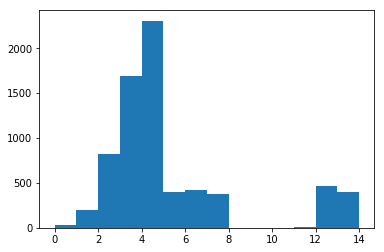

In [11]:
plt.hist([t for trial in Y for t in trial], bins=bins);

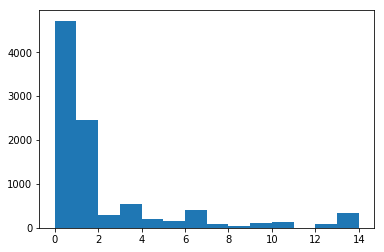

In [12]:
plt.hist([t for trial in XX_A for t in trial], bins=bins);

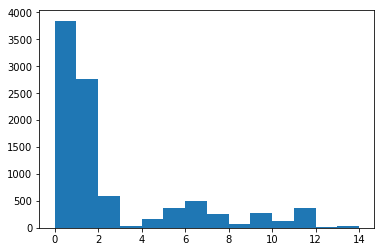

In [13]:
plt.hist([t for trial in XX_B for t in trial], bins=bins);

In [14]:
len(S), sum(Z_A), sum(Z_B)

(12816, 1939, 1201)

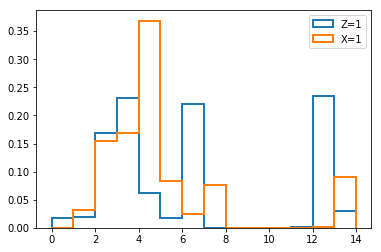

In [15]:
plt.hist([t for trial in Y[Z_A==1] for t in trial], bins=bins, histtype='step', lw=2, label='Z=1', density=True);
plt.hist([t for trial in Y[X_A==1] for t in trial], bins=bins, histtype='step', lw=2, label='X=1', density=True);
plt.legend()

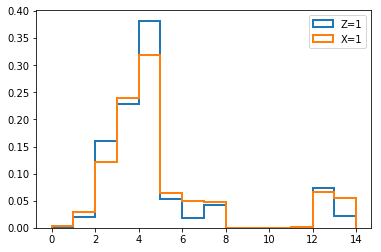

In [16]:
plt.hist([t for trial in Y[Z_B==1] for t in trial], bins=bins, histtype='step', lw=2, label='Z=1', density=True);
plt.hist([t for trial in Y[X_B==1] for t in trial], bins=bins, histtype='step', lw=2, label='X=1', density=True);
plt.legend()

# spike correlations

In [87]:
sa = []
for i, t0, t1, t2 in zip(spk_prev_i, ZZ, XX_B, Y):
    if i == 0:
        tt = np.concatenate([[t0], t1])
    else:
        tt = t1
    sa.append([s for t in tt for s in t2 - t])
sa = np.array(sa)

sb = []
for i, t0, t1, t2 in zip(spk_prev_i, ZZ, XX_B, Y):
    if i == 1:
        tt = np.concatenate([[t0], t1])
    else:
        tt = t1
    sb.append([s for t in tt for s in t2 - t])
sb = np.array(sb)

In [90]:
saz = [t for tr in sa[Z_A==1] for t in tr]
sax = [t for tr in sa[X_A==1] for t in tr]

In [91]:
sbz = [t for tr in sb[Z_B==1] for t in tr]
sbx = [t for tr in sb[X_B==1] for t in tr]

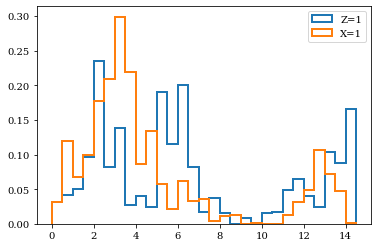

In [103]:
b = np.arange(0, 15, .5)
plt.hist(saz, bins=b, histtype='step', lw=2, density=True, label='Z=1')
plt.hist(sax, bins=b, histtype='step', lw=2, density=True, label='X=1')
plt.legend()

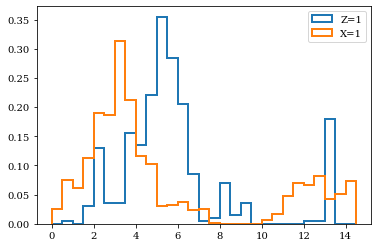

In [104]:
plt.hist(sbz, bins=b, histtype='step', lw=2, density=True, label='Z=1')
plt.hist(sbx, bins=b, histtype='step', lw=2, density=True, label='X=1')
plt.legend()

In [5]:
np.savez('longrun_triple_branched.npz', data={
    'stim_times': stim_times, 
    'spk_prev_i': spk_prev_i, 
    'spk_prev_t': spk_prev_t, 
    'spk_mon2_i': spk_mon2_i, 
    'spk_mon2_t': spk_mon2_t
})